## OBTAIN THE ACCESS TOKEN:

In [3]:
from pathlib import Path
access_token = Path('access_key.py').read_text()
access_token

'APP_USR-4211393471093999-062718-84d032a657ca18f1df51caf91b05a89d-90109602'

# CATÁLOGO DE CATEGORÍAS DE MELI MEXICO

In [4]:
# import requests

# site_id="MLM"

# url_cat=f'https://api.mercadolibre.com/sites/{site_id}/categories'

# response_cat= requests.get(url_cat).json()
# response_cat

[{'id': 'MLM1747', 'name': 'Accesorios para Vehículos'},
 {'id': 'MLM189530', 'name': 'Agro'},
 {'id': 'MLM1403', 'name': 'Alimentos y Bebidas'},
 {'id': 'MLM1071', 'name': 'Animales y Mascotas'},
 {'id': 'MLM1367', 'name': 'Antigüedades y Colecciones'},
 {'id': 'MLM1368', 'name': 'Arte, Papelería y Mercería'},
 {'id': 'MLM1743', 'name': 'Autos, Motos y Otros'},
 {'id': 'MLM1384', 'name': 'Bebés'},
 {'id': 'MLM1246', 'name': 'Belleza y Cuidado Personal'},
 {'id': 'MLM1039', 'name': 'Cámaras y Accesorios'},
 {'id': 'MLM1051', 'name': 'Celulares y Telefonía'},
 {'id': 'MLM1648', 'name': 'Computación'},
 {'id': 'MLM1144', 'name': 'Consolas y Videojuegos'},
 {'id': 'MLM1276', 'name': 'Deportes y Fitness'},
 {'id': 'MLM1575', 'name': 'Electrodomésticos'},
 {'id': 'MLM1000', 'name': 'Electrónica, Audio y Video'},
 {'id': 'MLM186863', 'name': 'Herramientas y Construcción'},
 {'id': 'MLM1574', 'name': 'Hogar, Muebles y Jardín'},
 {'id': 'MLM1499', 'name': 'Industrias y Oficinas'},
 {'id': 'MLM

# Código general para empezar búsquedas (1 SÓLO RESULTADO)

In [18]:
import math
import requests

search_term="ciudad de méxico"
category_for_search="MLM1459"

site_id="MLM"

url=f"https://api.mercadolibre.com/sites/{site_id}/search"

In [19]:
params={
    "q":search_term,
    "category":category_for_search,
    "state": "TUxNUERJUzYwOTQ", #"state": "TUxNUERJUzYwOTQ" es la búsqueda para CDMX
    "OPERATION": 242075, #OPERATION": 242075 quiere decir que es una venta
    "offset":0,
    "limit":50
}

response= requests.get(url,params=params).json()

In [20]:
number_of_total_results = response["paging"]["total"]
number_of_total_results

2031

## Requests para búsqueda de depto (MULTIPLE RESULTS) -SIN ACCESS TOKEN-

In [21]:
# response= requests.get(url,params=params).json()
# number_of_total_results=response["paging"]["total"]

# number_of_total_results=300
total_paging_times=math.ceil(number_of_total_results/50)

results=[]

for x in range(total_paging_times):

    params={
        #I need to add the params from the previous cell
    "q":search_term,
    "category":category_for_search,
    "state": "TUxNUERJUzYwOTQ", #"state": "TUxNUERJUzYwOTQ" es la búsqueda para CDMX
    "OPERATION": 242075, #OPERATION": 242075 quiere decir que es una venta
    "offset":x*50,
    "limit":50
    }    
    response= requests.get(url,params=params).json()
    results.append(response)

## Requests para búsqueda de depto (MULTIPLE RESULTS) -CON ACCESS TOKEN-

In [21]:
# CODE TO SEARCH FOR ALL THE RESULTS:
# response= requests.get(url,params=params).json()
# number_of_total_results=response["paging"]["total"]


# CODE TO SEARCH FOR A DEFINITE NUMBER OF RESULTS:
# number_of_total_results=300


total_paging_times = math.ceil(number_of_total_results/50)

results=[]

for x in range(total_paging_times):

    headers = {'Authorization': f'Bearer {access_token}'}
        
    params={
        #I need to add the params from the previous cell
    "q":search_term,
    "category":category_for_search,
    "state": "TUxNUERJUzYwOTQ", #"state": "TUxNUERJUzYwOTQ" es la búsqueda para CDMX
    "OPERATION": 242075, #OPERATION": 242075 quiere decir que es una venta
    "offset":x*50,
    "limit":50
    }    
    response= requests.get(url,params=params, headers = headers).json()
    results.append(response)

In [22]:
number_of_pages=len(results)
total_count = 0

for i in range(number_of_pages):
    number_of_results_in_page=len(results[i]["results"])
    
    for x in range(number_of_results_in_page):
        total_count += 1
        
print(number_of_total_results)
print(total_count)

2031
2031


In [39]:
results[20]["results"][44]["attributes"]

[{'name': 'Recámaras',
  'value_struct': None,
  'attribute_group_id': 'FIND',
  'id': 'BEDROOMS',
  'value_name': '2',
  'values': [{'id': None,
    'name': '2',
    'struct': None,
    'source': 4450541736496387}],
  'attribute_group_name': 'Ficha técnica',
  'source': 4450541736496387,
  'value_id': None},
 {'name': 'Superficie construida',
  'value_id': None,
  'value_name': '60 m²',
  'value_struct': None,
  'values': [{'struct': None,
    'source': 4450541736496387,
    'id': None,
    'name': '60 m²'}],
  'source': 4450541736496387,
  'id': 'COVERED_AREA',
  'attribute_group_id': 'FIND',
  'attribute_group_name': 'Ficha técnica'},
 {'values': [{'name': '1',
    'struct': None,
    'source': 4450541736496387,
    'id': None}],
  'attribute_group_name': 'Ficha técnica',
  'source': 4450541736496387,
  'name': 'Baños',
  'value_id': None,
  'value_struct': None,
  'attribute_group_id': 'FIND',
  'id': 'FULL_BATHROOMS',
  'value_name': '1'},
 {'id': 'TOTAL_AREA',
  'value_struct': N

In [41]:
#Guía para inmuebles

# DEBUGGERS:
    #         print(f'LINE 45 - att_length{att_length}')
#         print(f'LINE 46 - number_of_pages: {i}, number_of_results_in_page: {x}')

import pandas as pd

number_of_pages=len(results)
total_count = 0

titles=[]
type_of_operation=[]
state=[]
city=[]
colonia=[]
latitude=[]
longitude=[]
square_meters=[]
unit=[]
price=[]
currency=[]
permalink=[]
item_condition = []
thumbnail = []
property_type=[]
real_state_agency = []
announcement_id = []
address_street = []
bedrooms_number = []
full_bathrooms = []


for i in range(number_of_pages):
    number_of_results_in_page=len(results[i]["results"])
    
    for x in range(number_of_results_in_page):
        total_count += 1
               
        titles.append(results[i]["results"][x]['title'])
        
        
    #TIPO DE OPERACIÓN (VENTA O RENTA):
    
        att_length = len(results[i]["results"][x]["attributes"])

        for j in range(att_length):
            if results[i]["results"][x]["attributes"][j]["id"] == "OPERATION":                
                operacion = results[i]["results"][x]["attributes"][j]["value_name"]
                type_of_operation.append(operacion)
            if results[i]["results"][x]["attributes"][j]["id"] == "ITEM_CONDITION":                
                condition = results[i]["results"][x]["attributes"][j]["value_name"]
                item_condition.append(condition)
                
                #PROPERTY TYPE (CASA O DEPARTAMENTO):
            if results[i]["results"][x]["attributes"][j]["id"] == "PROPERTY_TYPE":
                definition_of_property = results[i]["results"][x]["attributes"][j]["values"][0]["name"]
                property_type.append(definition_of_property)       
           

                #COVERED AREA AND TOTAL AREA:
            if results[i]["results"][x]["attributes"][j]["id"] == "COVERED_AREA":                
                try:
                    covered_area_meters = results[i]["results"][x]["attributes"][j]["value_struct"]["number"]
                    covered_area_unit = results[i]["results"][x]["attributes"][j]["value_struct"]["unit"]
                except:
                    covered_area_meters = results[i]["results"][x]["attributes"][j]["value_name"]
                    covered_area_unit = 'missing'

          
            if results[i]["results"][x]["attributes"][j]["id"] == "TOTAL_AREA":
                try:
                    total_area_meters = results[i]["results"][x]["attributes"][j]["value_struct"]["number"]
                    total_area_unit = results[i]["results"][x]["attributes"][j]["value_struct"]["unit"]
                except:
                    total_area_meters = results[i]["results"][x]["attributes"][j]["value_name"]
                    total_area_unit = 'missing'
#                     print(f'line: 72, page: {i}, result_number: {x}')
                
                
                #NÚMERO DE RECÁMARAS EN LA PROPIEDAD:
            if results[i]["results"][x]["attributes"][j]["id"] == "BEDROOMS":
                bedrooms_number.append(results[i]["results"][x]["attributes"][j]["values"][0]["name"])
            if results[i]["results"][x]["attributes"][j]["id"] == "MAX_BEDROOMS":
                bedrooms_number.append(results[i]["results"][x]["attributes"][j]["value_name"])                
                                                
                #NÚMERO DE BAÑOS COMPLETOS EN LA PROPIEDAD:
            if results[i]["results"][x]["attributes"][j]["id"] == "FULL_BATHROOMS":
                full_bathrooms.append(results[i]["results"][x]["attributes"][j]["values"][0]["name"])
            if results[i]["results"][x]["attributes"][j]["id"] == "MAX_BATHROOMS":
                full_bathrooms.append(results[i]["results"][x]["attributes"][j]["values"][0]["name"])

                
#  SQUARE METERS AND UNITS DOUBLE CHECK:        
        
        try:                
            if covered_area_meters >= total_area_meters: 
                square_meters.append(covered_area_meters)
                unit.append(covered_area_unit)                
                
            elif covered_area_meters < total_area_meters:
                square_meters.append(total_area_meters)
                unit.append(total_area_unit)
        
        except:
            continue
            
    
        items_in_square_meters = len(square_meters)  
       
        if items_in_square_meters != total_count:
            for j in range(att_length):
                if results[i]["results"][x]["attributes"][j]["id"] == "MAX_COVERED_AREA":
                    square_meters.append(results[i]["results"][x]["attributes"][j]["value_struct"]["number"])
                    unit.append(results[i]["results"][x]["attributes"][j]["value_struct"]["unit"])        
           
        items_in_square_meters_unit = len(unit)  
       
        if items_in_square_meters_unit != total_count:
#             print(f'LINE 106 - square_meters_unit- number_of_pages: {i}, number_of_results_in_page: {x}')
            square_meters.append("not available")   
            unit.append("not available")
    
    
#  REST OF THE ITEMS DOUBLE CHECK:  
    
        items_in_typeOfOperation = len(type_of_operation)  
       
        if items_in_typeOfOperation != total_count:
            
            try:
                operacion=results[i]["results"][x]["attributes"][7]["value_name"]          
            except:
                operacion=results[i]["results"][x]["attributes"][4]["value_name"]   
        
                

        items_in_bedrooms_number = len(bedrooms_number)  
       
        if items_in_bedrooms_number != total_count:            
            bedrooms_number.append("not available")

            
        items_in_full_bathrooms = len(full_bathrooms)  
       
        if items_in_full_bathrooms != total_count:
            full_bathrooms.append("not available")
            
            

    # CONDICIÓN DEL INMUEBLE:
            
        items_in_itemCondition = len(item_condition)       
       
        if items_in_itemCondition != total_count:
            
            
            if (att_length < 5):
                condition = "not specified"
                
            else:
                try:
                    condition = results[i]["results"][x]["attributes"][7]["value_name"]
                except:
                    condition=results[i]["results"][x]["attributes"][4]["value_name"]
            
                if condition != "Nuevo" or "Usado":
                    condition = "not specified"
            
            item_condition.append(condition)    
          
             
        
        state.append(results[i]["results"][x]["address"]["state_name"])
        city.append(results[i]["results"][x]["address"]["city_name"])        
        colonia.append(results[i]["results"][x]["location"]["neighborhood"]["name"])        
        latitude.append(results[i]["results"][x]["location"]["latitude"])
        longitude.append(results[i]["results"][x]["location"]["longitude"])
                 
        price.append(results[i]["results"][x]["price"])
        currency.append(results[i]["results"][x]["currency_id"])
        permalink.append(results[i]["results"][x]["permalink"])
        thumbnail.append(results[i]["results"][x]["thumbnail"])
        real_state_agency.append(results[i]["results"][x]["seller"]["real_estate_agency"])
        announcement_id.append(results[i]["results"][x]["id"])
        address_street.append(results[i]["results"][x]["location"]["address_line"])
        
        
tabla_final=pd.DataFrame({
    "Nombre de Publicación":titles,
    "ID": announcement_id,
    "Tipo de propiedad": property_type,
    "Tipo de Operación":type_of_operation,
    "Condición del Inmueble": item_condition,
    "Número de recámaras": bedrooms_number,
    "Número de baños completos": full_bathrooms,
    "Estado":state,
    "Ciudad":city,
    "Colonia":colonia,
    "Avenida":address_street,
    "Latitud":latitude,
    "Longitud":longitude,    
    "Número de m2":square_meters,
    "Unidad de medida":unit,
    "Precio":price,
    "Moneda":currency,
    "Link de la publicación":permalink,
    "Foto de publicación":thumbnail,
    "Real State Agency?": real_state_agency
})

# tabla_final["Precio"]=tabla_final["Precio"].apply(lambda x : "${:,}".format(x))

tabla_final.head(2)

line: 72, page: 20, result_number: 44


,Nombre de Publicación,ID,Tipo de propiedad,Tipo de Operación,Condición del Inmueble,Número de recámaras,Número de baños completos,Estado,Ciudad,Colonia,Avenida,Latitud,Longitud,Número de m2,Unidad de medida,Precio,Moneda,Link de la publicación,Foto de publicación,Real State Agency?
0,Departamento En Calz. Mexico Tacuba Ciudad De ...,MLM905193551,Departamento,Venta,Usado,2,1,Distrito Federal,Miguel Hidalgo,Ampliación Torre Blanca,Calz. Mexico Tacuba,19.459528,-99.18994,100,m²,2610000,MXN,https://departamento.mercadolibre.com.mx/MLM-9...,http://http2.mlstatic.com/D_813666-MLM45536189...,True
1,Departamento En Guillermo Prieto Ciudad De México,MLM905131953,Departamento,Venta,Usado,2,2,Distrito Federal,Cuauhtémoc,San Rafael,Guillermo Prieto,19.437805,-99.16393,66,m²,3850000,MXN,https://departamento.mercadolibre.com.mx/MLM-9...,http://http2.mlstatic.com/D_736386-MLM45533670...,True


# API DEBUGGER CODE

In [16]:
fields = [titles,
type_of_operation,
state,
city,
colonia,
latitude,
longitude,
# square_meters,
# unit,
          
covered_area_meters_list,
covered_area_unit_list,
total_area_meters_list,
total_area_unit_list,
          
price,
currency,
permalink,
item_condition,
thumbnail,
property_type,
real_state_agency,
announcement_id,
address_street,
bedrooms_number,
full_bathrooms]

for x in range(len(fields)):
    print(f'field {x+1}, length: {len(fields[x])}')

field 1, length: 300
field 2, length: 300
field 3, length: 300
field 4, length: 300
field 5, length: 300
field 6, length: 300
field 7, length: 300
field 8, length: 300
field 9, length: 300
field 10, length: 300
field 11, length: 300
field 12, length: 300
field 13, length: 300
field 14, length: 300
field 15, length: 300
field 16, length: 300
field 17, length: 300
field 18, length: 300
field 19, length: 300
field 20, length: 300
field 21, length: 300
field 22, length: 300


In [15]:
len(fields)

20

## Exploration of the data

In [12]:
# for x in range(len(tabla_final)):
#     if tabla_final['covered_area_m2'][x] != tabla_final['total_area_m2'][x]:
#         string = f"covered_area: {tabla_final['covered_area_m2'][x]}, total_area: {tabla_final['total_area_m2'][x]}, permalink: {tabla_final['Link de la publicación'][x]}"
#         print(string)

KeyError: 'covered_area_m2'

In [24]:
tabla_final.shape

(817, 20)

In [42]:
tabla_final['Tipo de propiedad'].value_counts()

Departamento       1339
Casa                317
Terreno             135
Edificio             82
Oficina              75
Local comercial      50
Bodega               23
Otro inmueble         9
Rancho                1
Name: Tipo de propiedad, dtype: int64

In [49]:
tabla_final.dtypes

Nombre de Publicación         object
ID                            object
Tipo de propiedad             object
Tipo de Operación             object
Condición del Inmueble        object
Número de recámaras            int64
Número de baños completos      int64
Estado                        object
Ciudad                        object
Colonia                       object
Avenida                       object
Latitud                      float64
Longitud                     float64
Número de m2                  object
Unidad de medida              object
Precio                         int64
Moneda                        object
Link de la publicación        object
Foto de publicación           object
Real State Agency?              bool
dtype: object

### Drop row results

In [43]:
tabla_final = tabla_final.drop(tabla_final.loc[tabla_final["Tipo de propiedad"]=='Terreno',:].index)
tabla_final = tabla_final.drop(tabla_final.loc[tabla_final["Tipo de propiedad"]=='Oficina',:].index)
tabla_final = tabla_final.drop(tabla_final.loc[tabla_final["Tipo de propiedad"]=='Edificio',:].index)
tabla_final = tabla_final.drop(tabla_final.loc[tabla_final["Tipo de propiedad"]=='Local comercial',:].index)
tabla_final = tabla_final.drop(tabla_final.loc[tabla_final["Tipo de propiedad"]=='Otro inmueble',:].index)
tabla_final = tabla_final.drop(tabla_final.loc[tabla_final["Tipo de propiedad"]=='Bodega',:].index)
tabla_final = tabla_final.drop(tabla_final.loc[tabla_final["Tipo de propiedad"]=='Rancho',:].index)

In [56]:
tabla_final = tabla_final.reset_index()

del tabla_final['index']

tabla_final.head(1)

,Nombre de Publicación,ID,Tipo de propiedad,Tipo de Operación,Condición del Inmueble,Número de recámaras,Número de baños completos,Estado,Ciudad,Colonia,Avenida,Latitud,Longitud,Número de m2,Unidad de medida,Precio,Moneda,Link de la publicación,Foto de publicación,Real State Agency?
0,Departamento En Calz. Mexico Tacuba Ciudad De ...,MLM905193551,Departamento,Venta,Usado,2,1,Distrito Federal,Miguel Hidalgo,Ampliación Torre Blanca,Calz. Mexico Tacuba,19.459528,-99.18994,100,m²,2610000,MXN,https://departamento.mercadolibre.com.mx/MLM-9...,http://http2.mlstatic.com/D_813666-MLM45536189...,True


### These are formulas to clean data on specific cells:

In [65]:
tabla_final.loc[tabla_final["Número de m2"] == '60 m²', :]

,Nombre de Publicación,ID,Tipo de propiedad,Tipo de Operación,Condición del Inmueble,Número de recámaras,Número de baños completos,Estado,Ciudad,Colonia,Avenida,Latitud,Longitud,Número de m2,Unidad de medida,Precio,Moneda,Link de la publicación,Foto de publicación,Real State Agency?


In [62]:
cell_to_modify = tabla_final.loc[tabla_final["Número de m2"] == '60 m²', :].index[0]
cell_to_modify

915

In [64]:
tabla_final["Número de m2"][cell_to_modify] = 60
tabla_final["Unidad de medida"][cell_to_modify] = 'm²'

<ipython-input-64-4c33df5c7d11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_final["Número de m2"][cell_to_modify] = 60
<ipython-input-64-4c33df5c7d11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_final["Unidad de medida"][cell_to_modify] = 'm²'


In [66]:
tabla_final.iloc[915]

Nombre de Publicación         Departamento En Venta, Tlalpan, Ciudad De México
ID                                                                MLM888160222
Tipo de propiedad                                                 Departamento
Tipo de Operación                                                        Venta
Condición del Inmueble                                           not specified
Número de recámaras                                                          2
Número de baños completos                                                    1
Estado                                                        Distrito Federal
Ciudad                                                                 Tlalpan
Colonia                                                   San Lorenzo Huipulco
Avenida                                                           CALLE UNIDAD
Latitud                                                                19.2917
Longitud                                            

### Change the format of the cells to Numeric for further calculations

In [67]:
tabla_final["Número de recámaras"] = pd.to_numeric(tabla_final["Número de recámaras"])
tabla_final["Número de baños completos"] = pd.to_numeric(tabla_final["Número de baños completos"])
tabla_final["Número de m2"] = pd.to_numeric(tabla_final["Número de m2"])

### Filter out outliers and unaccurate listings

In [68]:
tabla_final = tabla_final.drop(tabla_final.loc[tabla_final['Número de m2']>=800,:].index)
tabla_final = tabla_final.drop(tabla_final.loc[tabla_final['Precio']>=200000000,:].index)
tabla_final = tabla_final.drop(tabla_final.loc[tabla_final["Número de m2"] < 40,:].index)
tabla_final = tabla_final.drop(tabla_final.loc[tabla_final['Número de recámaras']>10,:].index)
tabla_final = tabla_final.drop(tabla_final.loc[tabla_final['Número de baños completos']<1,:].index)
tabla_final = tabla_final.drop(tabla_final.loc[tabla_final['Número de recámaras']<1,:].index)
tabla_final = tabla_final.drop(tabla_final.loc[tabla_final['Número de baños completos']>10,:].index)

tabla_final = tabla_final.drop(tabla_final.loc[tabla_final['Longitud'].isna() == True , :].index)
tabla_final = tabla_final.drop(tabla_final.loc[tabla_final['Latitud'].isna() == True , :].index)

tabla_final = tabla_final.reset_index()

del tabla_final['index']

tabla_final.head()

,Nombre de Publicación,ID,Tipo de propiedad,Tipo de Operación,Condición del Inmueble,Número de recámaras,Número de baños completos,Estado,Ciudad,Colonia,Avenida,Latitud,Longitud,Número de m2,Unidad de medida,Precio,Moneda,Link de la publicación,Foto de publicación,Real State Agency?
0,Departamento En Calz. Mexico Tacuba Ciudad De ...,MLM905193551,Departamento,Venta,Usado,2,1,Distrito Federal,Miguel Hidalgo,Ampliación Torre Blanca,Calz. Mexico Tacuba,19.459528,-99.18994,100.0,m²,2610000,MXN,https://departamento.mercadolibre.com.mx/MLM-9...,http://http2.mlstatic.com/D_813666-MLM45536189...,True
1,Departamento En Guillermo Prieto Ciudad De México,MLM905131953,Departamento,Venta,Usado,2,2,Distrito Federal,Cuauhtémoc,San Rafael,Guillermo Prieto,19.437805,-99.16393,66.0,m²,3850000,MXN,https://departamento.mercadolibre.com.mx/MLM-9...,http://http2.mlstatic.com/D_736386-MLM45533670...,True
2,Departamento En Tanana Ciudad De México,MLM894048401,Departamento,Venta,Usado,3,2,Distrito Federal,Benito Juárez,Piedad Narvarte,Tanana,19.402048,-99.16170,82.0,m²,3650000,MXN,https://departamento.mercadolibre.com.mx/MLM-8...,http://http2.mlstatic.com/D_689111-MLM45430184...,True
3,"Casa En Venta, Cuajimalpa De Morelos, Ciudad D...",MLM876790201,Casa,Venta,not specified,3,3,Distrito Federal,Cuajimalpa De Morelos,Cuajimalpa,José María Castorena,19.361630,-99.29200,275.0,m²,9200000,MXN,https://casa.mercadolibre.com.mx/MLM-876790201...,http://http2.mlstatic.com/D_740151-MLM45420727...,True
4,"Departamento En Venta, Colonia Centro",MLM887136106,Departamento,Venta,Usado,2,2,Distrito Federal,Cuauhtémoc,Centro De La Ciudad De México Area 2,Revillagigedo 18,19.433860,-99.14591,50.0,m²,3500000,MXN,https://departamento.mercadolibre.com.mx/MLM-8...,http://http2.mlstatic.com/D_788741-MLM45132432...,True


### Final check of the table formatting

In [69]:
tabla_final.shape

(1545, 20)

In [70]:
tabla_final.dtypes

Nombre de Publicación         object
ID                            object
Tipo de propiedad             object
Tipo de Operación             object
Condición del Inmueble        object
Número de recámaras            int64
Número de baños completos      int64
Estado                        object
Ciudad                        object
Colonia                       object
Avenida                       object
Latitud                      float64
Longitud                     float64
Número de m2                 float64
Unidad de medida              object
Precio                         int64
Moneda                        object
Link de la publicación        object
Foto de publicación           object
Real State Agency?              bool
dtype: object

In [75]:
tabla_final['Tipo de propiedad'].value_counts()

Departamento    1297
Casa             248
Name: Tipo de propiedad, dtype: int64

In [74]:
tabla_final.describe().round()

,Número de recámaras,Número de baños completos,Latitud,Longitud,Número de m2,Precio
count,1545.0,1545.0,1543.0,1543.0,1545.0,1545.0
mean,2.0,2.0,19.0,-99.0,173.0,7965190.0
std,1.0,1.0,0.0,5.0,132.0,7221050.0
min,1.0,1.0,19.0,-99.0,40.0,15000.0
25%,2.0,2.0,19.0,-99.0,84.0,3500000.0
50%,2.0,2.0,19.0,-99.0,125.0,5715000.0
75%,3.0,3.0,19.0,-99.0,213.0,9800000.0
max,10.0,6.0,20.0,99.0,795.0,78000000.0


### Convert USD to MXN

# EXCHANGE RATES

In [79]:
# !pip install forex-python

  Created wheel for forex-python: filename=forex_python-1.5-py3-none-any.whl size=7234 sha256=00d4e0c4f2d2f2eb54d5317845059fd43bfc0fc88af55a87df4489f0f754f349
  Stored in directory: c:\users\intel nuc\appdata\local\pip\cache\wheels\2a\ed\cd\27419d49a382d12b6beeaa9f7dfc4f1e7b5045e693c7247d6c
  Created wheel for simplejson: filename=simplejson-3.17.2-py3-none-any.whl size=55458 sha256=d09a98e244803440d9816fee989ecf13a095bafd447d5db662bc1217fb9f5f11
  Stored in directory: c:\users\intel nuc\appdata\local\pip\cache\wheels\17\72\7d\df0984c925921e22322ea462a6f861e9d0617881192deb9b8d
Successfully built forex-python simplejson


You should consider upgrading via the 'c:\users\intel nuc\onedrive\++tec data analytics bootcamp\bootcamp\scripts\python.exe -m pip install --upgrade pip' command.


In [84]:
from forex_python.converter import CurrencyRates
c = CurrencyRates()
current_exchange_rates = c.get_rates('USD')   # you can directly call get_rates('USD')

In [87]:
mxn_exchange_rate = current_exchange_rates['MXN']
mxn_exchange_rate

20.1352486559

In [78]:
tabla_final['Moneda'].value_counts()

MXN    1496
USD      49
Name: Moneda, dtype: int64

In [77]:
tabla_final.loc[tabla_final['Moneda'] == 'USD',:]

,Nombre de Publicación,ID,Tipo de propiedad,Tipo de Operación,Condición del Inmueble,Número de recámaras,Número de baños completos,Estado,Ciudad,Colonia,Avenida,Latitud,Longitud,Número de m2,Unidad de medida,Precio,Moneda,Link de la publicación,Foto de publicación,Real State Agency?
36,"Garden House, Venta, Polanco, Miguel Hidalgo, ...",MLM902640925,Casa,Venta,not specified,2,2,Distrito Federal,Miguel Hidalgo,Polanco,A. Musset 311,19.436464,-99.196320,170.0,m²,967876,USD,https://casa.mercadolibre.com.mx/MLM-902640925...,http://http2.mlstatic.com/D_640272-MLM45475108...,True
158,"Casa En Venta, Álvaro Obregón, Ciudad De México",MLM807686562,Casa,Venta,not specified,4,4,Distrito Federal,Alvaro Obregón,San Angel Inn,Jardin,19.350122,-99.198520,461.0,m²,5000000,USD,https://casa.mercadolibre.com.mx/MLM-807686562...,http://mlm-s1-p.mlstatic.com/948848-MLM4322903...,True
191,"Casa En Venta, Cuajimalpa De Morelos, Ciudad D...",MLM794648719,Casa,Venta,not specified,3,4,Distrito Federal,Cuajimalpa De Morelos,Lomas De Vista Hermosa,Avenida Loma Larga,19.374468,-99.273346,420.0,m²,800000,USD,https://casa.mercadolibre.com.mx/MLM-794648719...,http://http2.mlstatic.com/D_865013-MLM43952802...,True
257,¡vive En Una De Las Mejores Zonas De La Cuidad...,MLM793857874,Departamento,Venta,Usado,3,3,Distrito Federal,Cuajimalpa De Morelos,Bosques de las Lomas,Paso de Tamarindos 45 Int. 201,19.391304,-99.250680,405.0,m²,650000,USD,https://departamento.mercadolibre.com.mx/MLM-7...,http://mlm-s1-p.mlstatic.com/743678-MLM4265560...,True
259,"Departamento En Venta, Miguel Hidalgo, Ciudad ...",MLM781373905,Departamento,Venta,not specified,3,3,Distrito Federal,Miguel Hidalgo,Ampliación Torre Blanca,Aristoteles,19.433228,-99.193360,293.0,m²,2100000,USD,https://departamento.mercadolibre.com.mx/MLM-7...,http://http2.mlstatic.com/D_745564-MLM42051381...,True
282,"Departamento En Venta, Miguel Hidalgo, Ciudad ...",MLM758106282,Departamento,Venta,not specified,3,3,Distrito Federal,Miguel Hidalgo,Ampliación Torre Blanca,Ruben Dario,19.428200,-99.186264,562.0,m²,4900000,USD,https://departamento.mercadolibre.com.mx/MLM-7...,http://mlm-s1-p.mlstatic.com/806206-MLM4081500...,True
306,"Departamento En Venta, Cuajimalpa De Morelos, ...",MLM784567362,Departamento,Venta,not specified,3,3,Distrito Federal,Cuajimalpa De Morelos,Bosques de las Lomas,Paseo de los Laureles,19.386547,-99.257500,385.0,m²,1200000,USD,https://departamento.mercadolibre.com.mx/MLM-7...,http://mlm-s1-p.mlstatic.com/922288-MLM4217561...,True
342,"Departamento En Venta, Miguel Hidalgo, Ciudad ...",MLM865357724,Departamento,Venta,not specified,3,3,Distrito Federal,Miguel Hidalgo,Ampliación Torre Blanca,Polanco,19.435736,-99.211970,360.0,m²,3800000,USD,https://departamento.mercadolibre.com.mx/MLM-8...,http://http2.mlstatic.com/D_919288-MLM44651309...,True
350,"Casa En Venta, Miguel Hidalgo, Ciudad De México",MLM758095700,Casa,Venta,not specified,3,2,Distrito Federal,Miguel Hidalgo,Ampliación Torre Blanca,Calderon de la Barca,19.433735,-99.199020,320.0,m²,1950000,USD,https://casa.mercadolibre.com.mx/MLM-758095700...,http://http2.mlstatic.com/D_628521-MLM43055911...,True
377,"Departamento En Venta, Cuajimalpa De Morelos, ...",MLM830824848,Departamento,Venta,not specified,3,3,Distrito Federal,Cuajimalpa De Morelos,Lomas Del Chamizal,Bosques de Pirules Esq. Av Stim,19.393566,-99.260216,370.0,m²,1850000,USD,https://departamento.mercadolibre.com.mx/MLM-8...,http://http2.mlstatic.com/D_941984-MLM43823488...,True


In [88]:
for x in range(len(tabla_final)):
    if tabla_final['Moneda'][x] == 'USD':
        tabla_final['Moneda'][x] = 'MXN'
        tabla_final['Precio'][x] = float(tabla_final['Precio'][x]) * mxn_exchange_rate

<ipython-input-88-05ff9e0aa02a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_final['Moneda'][x] = 'MXN'
<ipython-input-88-05ff9e0aa02a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_final['Precio'][x] = float(tabla_final['Precio'][x]) * mxn_exchange_rate


In [89]:
tabla_final.loc[tabla_final['Moneda'] == 'USD',:]

,Nombre de Publicación,ID,Tipo de propiedad,Tipo de Operación,Condición del Inmueble,Número de recámaras,Número de baños completos,Estado,Ciudad,Colonia,Avenida,Latitud,Longitud,Número de m2,Unidad de medida,Precio,Moneda,Link de la publicación,Foto de publicación,Real State Agency?


## Add the "Price per m2" field

In [90]:
tabla_final['Precio por m2'] = ''

for x in range(len(tabla_final)):
    tabla_final['Precio por m2'][x] = tabla_final['Precio'][x] / tabla_final['Número de m2'][x]

<ipython-input-90-2bff5b0447ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_final['Precio por m2'][x] = tabla_final['Precio'][x] / tabla_final['Número de m2'][x]


In [91]:
tabla_final.head(2)

,Nombre de Publicación,ID,Tipo de propiedad,Tipo de Operación,Condición del Inmueble,Número de recámaras,Número de baños completos,Estado,Ciudad,Colonia,...,Latitud,Longitud,Número de m2,Unidad de medida,Precio,Moneda,Link de la publicación,Foto de publicación,Real State Agency?,Precio por m2
0,Departamento En Calz. Mexico Tacuba Ciudad De ...,MLM905193551,Departamento,Venta,Usado,2,1,Distrito Federal,Miguel Hidalgo,Ampliación Torre Blanca,...,19.459528,-99.18994,100.0,m²,2610000,MXN,https://departamento.mercadolibre.com.mx/MLM-9...,http://http2.mlstatic.com/D_813666-MLM45536189...,True,26100
1,Departamento En Guillermo Prieto Ciudad De México,MLM905131953,Departamento,Venta,Usado,2,2,Distrito Federal,Cuauhtémoc,San Rafael,...,19.437805,-99.16393,66.0,m²,3850000,MXN,https://departamento.mercadolibre.com.mx/MLM-9...,http://http2.mlstatic.com/D_736386-MLM45533670...,True,58333.3


### Sort the table columns

In [92]:
len([x for x in tabla_final.columns])

21

In [93]:
sorted_columns = [ 'Nombre de Publicación',
    'Estado',
 'Ciudad',
 'Colonia',
 'Avenida',
 'Tipo de propiedad',
 'Tipo de Operación',
 'Condición del Inmueble',
'Precio',
'Precio por m2',
 'Moneda',
 'Número de recámaras',
 'Número de baños completos',
 'Número de m2',
 'Unidad de medida',
 'Link de la publicación',
 'Foto de publicación',
 'Real State Agency?',
'Latitud',
 'Longitud',
'ID',]

In [94]:
len(sorted_columns)

21

In [95]:
tabla_final = tabla_final[sorted_columns]

### Final check for outliers

In [102]:
tabla_final.loc[tabla_final['Precio por m2']<= 600,:]

,Nombre de Publicación,Estado,Ciudad,Colonia,Avenida,Tipo de propiedad,Tipo de Operación,Condición del Inmueble,Precio,Precio por m2,...,Número de recámaras,Número de baños completos,Número de m2,Unidad de medida,Link de la publicación,Foto de publicación,Real State Agency?,Latitud,Longitud,ID


In [101]:
tabla_final['Precio por m2'] = pd.to_numeric(tabla_final['Precio por m2'])
tabla_final = tabla_final.drop(tabla_final.loc[tabla_final['Precio por m2']<= 600,:].index)

### Reformat the index on the table

In [103]:
tabla_final = tabla_final.reset_index()

del tabla_final['index']

tabla_final.head(2)

,Nombre de Publicación,Estado,Ciudad,Colonia,Avenida,Tipo de propiedad,Tipo de Operación,Condición del Inmueble,Precio,Precio por m2,...,Número de recámaras,Número de baños completos,Número de m2,Unidad de medida,Link de la publicación,Foto de publicación,Real State Agency?,Latitud,Longitud,ID
0,Departamento En Calz. Mexico Tacuba Ciudad De ...,Distrito Federal,Miguel Hidalgo,Ampliación Torre Blanca,Calz. Mexico Tacuba,Departamento,Venta,Usado,2610000,26100.000000,...,2,1,100.0,m²,https://departamento.mercadolibre.com.mx/MLM-9...,http://http2.mlstatic.com/D_813666-MLM45536189...,True,19.459528,-99.18994,MLM905193551
1,Departamento En Guillermo Prieto Ciudad De México,Distrito Federal,Cuauhtémoc,San Rafael,Guillermo Prieto,Departamento,Venta,Usado,3850000,58333.333333,...,2,2,66.0,m²,https://departamento.mercadolibre.com.mx/MLM-9...,http://http2.mlstatic.com/D_736386-MLM45533670...,True,19.437805,-99.16393,MLM905131953


### FINAL CHECK TO THE INTEGRITY OF THE DATA

In [109]:
tabla_final.shape

(1543, 21)

In [23]:
link_to_check = 'https://departamento.mercadolibre.com.mx/MLM-870468631-departamento-en-venta-alvaro-obregon-ciudad-de-mexico-_JM'

propiedades_df.loc[propiedades_df['Link de la publicación']== link_to_check , :]

,Nombre de Publicación,Estado,Ciudad,Colonia,Avenida,Tipo de propiedad,Tipo de Operación,Condición del Inmueble,Precio,Precio por m2,...,Número de baños completos,Número de m2,Unidad de medida,Link de la publicación,Foto de publicación,Real State Agency?,Latitud,Longitud,ID,updated_at
1240,"Departamento En Venta, Álvaro Obregón, Ciudad ...",Distrito Federal,Alvaro Obregón,Ampliación Alpes,Tarango 72,Departamento,Venta,Usado,2500000,33333.33333,...,1,75.0,m²,https://departamento.mercadolibre.com.mx/MLM-8...,http://mlm-s2-p.mlstatic.com/664497-MLM4477848...,True,19.363523,-99.21783,MLM870468631,04/12/2021


<AxesSubplot:>

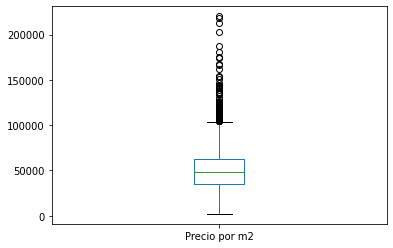

In [105]:
tabla_final['Precio por m2'].plot(kind ='box')

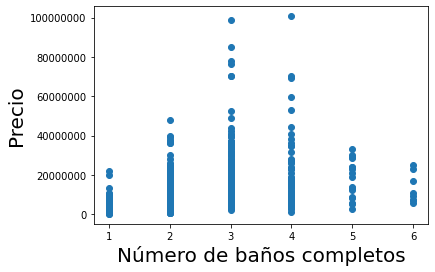

In [107]:
import matplotlib.pyplot as plt

x_axis = 'Número de baños completos'
y_axis = 'Precio'

plt.scatter(x = tabla_final[x_axis], y = tabla_final[y_axis])
plt.ticklabel_format(style='plain')
plt.xlabel(x_axis, fontsize = 20)
plt.ylabel(y_axis, fontsize = 20)
plt.show()

## ADD THE TIMESTAMP TO THE TABLE AND SORT THE COLUMNS

In [114]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
# print("now =", now)

# dd/mm/YY H:M:S
dt_string = now.strftime("%m/%d/%Y")
print(dt_string)	

04/12/2021


In [ ]:
tabla_final.index = pd.Series([dt_string] * len(tabla_final))
tabla_final = tabla_final.reset_index()
tabla_final = tabla_final.rename(columns={"index":"updated_at"})
tabla_final.head(2)

In [130]:
sorted_columns = [ 'Nombre de Publicación',
    'Estado',
 'Ciudad',
 'Colonia',
 'Avenida',
 'Tipo de propiedad',
 'Tipo de Operación',
 'Condición del Inmueble',
'Precio',
'Precio por m2',
 'Moneda',
 'Número de recámaras',
 'Número de baños completos',
 'Número de m2',
 'Unidad de medida',
 'Link de la publicación',
 'Foto de publicación',
 'Real State Agency?',
'Latitud',
 'Longitud',
'ID', 'updated_at']

In [131]:
len(sorted_columns)

22

In [132]:
tabla_final = tabla_final[sorted_columns]
tabla_final.head(2)

,Nombre de Publicación,Estado,Ciudad,Colonia,Avenida,Tipo de propiedad,Tipo de Operación,Condición del Inmueble,Precio,Precio por m2,...,Número de baños completos,Número de m2,Unidad de medida,Link de la publicación,Foto de publicación,Real State Agency?,Latitud,Longitud,ID,updated_at
0,"Departamento En Venta, Miguel Hidalgo, Ciudad ...",Distrito Federal,Miguel Hidalgo,Ampliación Torre Blanca,Tennyson,Departamento,Venta,not specified,70473370,220229.281250,...,3,320.0,m²,https://departamento.mercadolibre.com.mx/MLM-7...,http://mlm-s2-p.mlstatic.com/913849-MLM4081500...,True,19.432670,-99.19496,MLM758104979,04/12/2021
1,"Casa En Venta, Álvaro Obregón, Ciudad De México",Distrito Federal,Alvaro Obregón,San Angel Inn,Jardin,Casa,Venta,not specified,100676243,218386.644252,...,4,461.0,m²,https://casa.mercadolibre.com.mx/MLM-807686562...,http://mlm-s1-p.mlstatic.com/948848-MLM4322903...,True,19.350122,-99.19852,MLM807686562,04/12/2021


## SAVE the Final result

In [25]:
tabla_final = tabla_final.sort_values(by = 'Número de m2', ascending = False)

In [27]:
# tabla_final.to_csv('ML_departamentos_CDMX.csv', index = False, encoding = 'latin1')

In [26]:
tabla_final.to_json('static\data/ML_departamentos_CDMX.json', force_ascii = True, orient="records")

# -----------------------------------------------------------------------------------------

# Importar el archivo desde unidad local

In [24]:
import pandas as pd

In [25]:
propiedades_df = pd.read_csv('csv_files/ML_departamentos_CDMX.csv', encoding = 'latin1')

In [4]:
propiedades_df.shape

(1541, 22)

## Exploration of table

In [3]:
propiedades_df = pd.read_csv('csv_files/ML_departamentos_CDMX.csv', encoding = 'latin1')

In [4]:
len(propiedades_df)

1541

In [7]:
[x for x in propiedades_df.columns]

['Nombre de Publicación',
 'Estado',
 'Ciudad',
 'Colonia',
 'Avenida',
 'Tipo de propiedad',
 'Tipo de Operación',
 'Condición del Inmueble',
 'Precio',
 'Precio por m2',
 'Moneda',
 'Número de recámaras',
 'Número de baños completos',
 'Número de m2',
 'Unidad de medida',
 'Link de la publicación',
 'Foto de publicación',
 'Real State Agency?',
 'Latitud',
 'Longitud',
 'ID',
 'updated_at']

In [8]:
propiedades_df.head(5)

,Nombre de Publicación,Estado,Ciudad,Colonia,Avenida,Tipo de propiedad,Tipo de Operación,Condición del Inmueble,Precio,Precio por m2,...,Número de baños completos,Número de m2,Unidad de medida,Link de la publicación,Foto de publicación,Real State Agency?,Latitud,Longitud,ID,updated_at
0,"Casa En Venta, Miguel Hidalgo, Ciudad De México",Distrito Federal,Miguel Hidalgo,Lomas de Chapultepec I Sección,Paseo de las Palmas,Casa,Venta,not specified,69500000,87421.38365,...,4,795.0,m²,https://casa.mercadolibre.com.mx/MLM-786181310...,http://http2.mlstatic.com/D_796522-MLM42242895...,True,19.411036,-99.22981,MLM786181310,04/12/2021
1,"Casa En Venta, Miguel Hidalgo, Ciudad De México",Distrito Federal,Miguel Hidalgo,Lomas De Reforma,Alcázar de Toledo,Casa,Venta,not specified,24900000,31360.20151,...,3,794.0,m²,https://casa.mercadolibre.com.mx/MLM-807670614...,http://http2.mlstatic.com/D_862994-MLM43228401...,True,19.402567,-99.23447,MLM807670614,04/12/2021
2,"Casa En Venta, Álvaro Obregón, Ciudad De México",Distrito Federal,Alvaro Obregón,Lomas Axomiatla,Calzada de las Aguilas,Casa,Venta,not specified,23500000,30244.53024,...,3,777.0,m²,https://casa.mercadolibre.com.mx/MLM-853397528...,http://http2.mlstatic.com/D_831549-MLM44402243...,True,19.341574,-99.25253,MLM853397528,04/12/2021
3,"Departamento En Venta, Miguel Hidalgo, Ciudad ...",Distrito Federal,Miguel Hidalgo,Real De Las Lomas,Paseo de la Reforma,Departamento,Venta,not specified,44297547,58057.07339,...,4,763.0,m²,https://departamento.mercadolibre.com.mx/MLM-8...,http://http2.mlstatic.com/D_644336-MLM45319532...,True,19.397224,-99.23671,MLM896404186,04/12/2021
4,"Residencia Para Reformar, En Una De Las Coloni...",Distrito Federal,Tlalpan,Jardines En La Montaña,Pico de Verapaz,Casa,Venta,Usado,18950000,25266.66667,...,5,750.0,m²,https://casa.mercadolibre.com.mx/MLM-841706122...,http://http2.mlstatic.com/D_774007-MLM44127728...,True,19.300726,-99.19938,MLM841706122,04/12/2021


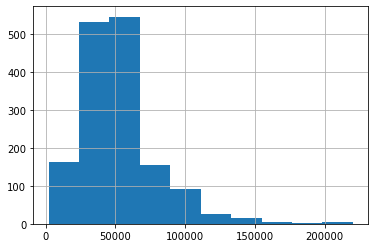

In [5]:
propiedades_df['Precio por m2'].hist()

In [12]:
propiedades_df['Precio por m2'].describe()

count       675.000000
mean      44253.082482
std       23274.183809
min        2722.966667
25%       31658.305463
50%       43846.153846
75%       54390.283897
max      188083.350000
Name: Precio por m2, dtype: float64

In [6]:
propiedades_df["Tipo de propiedad"].value_counts()

Departamento    574
Casa            101
Name: Tipo de propiedad, dtype: int64